In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify the file path
file_path = "C:/Users/chimi/Desktop/Python Data Science Projects/space_debris_classifications/space_debris_classifications/tasks/task 3- EDA/spacedebris_clean2.csv"

# Read the CSV file into a DataFrame
space_df = pd.read_csv(file_path)

In [3]:
# Display rows
space_df.head(5)

,OBJECT_NAME,OBJECT_ID,MEAN_ELEMENT_THEORY,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,...,Timestamp,Year,Month,Day,Hour,Minute,satellite_age,AP_DIFF,SEMIMINOR_AXIS,ORBITAL_VELOCITY
0,ARIANE 42P+ DEB,1992-072J,SGP4,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,26741,...,2021-10-31,2021,10,31,22,46,54,26988.776,15655.454942,4.391503
1,SL-8 DEB,1979-028C,SGP4,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,26743,...,2021-10-31,2021,10,31,16,32,54,45.208,7358.003280,7.360170
2,GSAT 1,2001-015A,SGP4,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,26745,...,2021-11-01,2021,11,1,5,22,54,1955.958,41186.242434,3.110510
3,CZ-4 DEB,1999-057MB,SGP4,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,26754,...,2021-10-31,2021,10,31,11,11,54,85.048,7014.947113,7.537940
4,CZ-4 DEB,1999-057MC,SGP4,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,26755,...,2021-10-31,2021,10,31,17,46,54,87.548,7031.263741,7.529185


In [4]:
space_df.shape

(14125, 35)

In [5]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14125 entries, 0 to 14124
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECT_NAME          14125 non-null  object 
 1   OBJECT_ID            14125 non-null  object 
 2   MEAN_ELEMENT_THEORY  14125 non-null  object 
 3   MEAN_MOTION          14125 non-null  float64
 4   ECCENTRICITY         14125 non-null  float64
 5   INCLINATION          14125 non-null  float64
 6   RA_OF_ASC_NODE       14125 non-null  float64
 7   ARG_OF_PERICENTER    14125 non-null  float64
 8   MEAN_ANOMALY         14125 non-null  float64
 9   NORAD_CAT_ID         14125 non-null  int64  
 10  REV_AT_EPOCH         14125 non-null  int64  
 11  BSTAR                14125 non-null  float64
 12  MEAN_MOTION_DOT      14125 non-null  float64
 13  MEAN_MOTION_DDOT     14125 non-null  float64
 14  SEMIMAJOR_AXIS       14125 non-null  float64
 15  PERIOD               14125 non-null 

In [6]:
space_df.isnull().sum()

OBJECT_NAME              0
OBJECT_ID                0
MEAN_ELEMENT_THEORY      0
MEAN_MOTION              0
ECCENTRICITY             0
INCLINATION              0
RA_OF_ASC_NODE           0
ARG_OF_PERICENTER        0
MEAN_ANOMALY             0
NORAD_CAT_ID             0
REV_AT_EPOCH             0
BSTAR                    0
MEAN_MOTION_DOT          0
MEAN_MOTION_DDOT         0
SEMIMAJOR_AXIS           0
PERIOD                   0
APOAPSIS                 0
PERIAPSIS                0
OBJECT_TYPE              0
RCS_SIZE               159
COUNTRY_CODE             0
LAUNCH_DATE              0
SITE                     0
FILE                     0
GP_ID                    0
Timestamp                0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
satellite_age            0
AP_DIFF                  0
SEMIMINOR_AXIS           0
ORBITAL_VELOCITY         0
dtype: int64

In [7]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14125 entries, 0 to 14124
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECT_NAME          14125 non-null  object 
 1   OBJECT_ID            14125 non-null  object 
 2   MEAN_ELEMENT_THEORY  14125 non-null  object 
 3   MEAN_MOTION          14125 non-null  float64
 4   ECCENTRICITY         14125 non-null  float64
 5   INCLINATION          14125 non-null  float64
 6   RA_OF_ASC_NODE       14125 non-null  float64
 7   ARG_OF_PERICENTER    14125 non-null  float64
 8   MEAN_ANOMALY         14125 non-null  float64
 9   NORAD_CAT_ID         14125 non-null  int64  
 10  REV_AT_EPOCH         14125 non-null  int64  
 11  BSTAR                14125 non-null  float64
 12  MEAN_MOTION_DOT      14125 non-null  float64
 13  MEAN_MOTION_DDOT     14125 non-null  float64
 14  SEMIMAJOR_AXIS       14125 non-null  float64
 15  PERIOD               14125 non-null 

In [8]:
# Convert 
space_df['OBJECT_TYPE'].value_counts()

DEBRIS         8431
PAYLOAD        4950
ROCKET BODY     744
Name: OBJECT_TYPE, dtype: int64

In [9]:

space_df['TARGET'] = space_df['OBJECT_TYPE'].apply(lambda x: 1 if x == 'DEBRIS' else 0)
space_df.drop(columns=['OBJECT_TYPE'], inplace=True)

In [10]:
cat_cols = ['RCS_SIZE']  # Replace with your categorical column names

# Perform one-hot encoding
df_encoded = pd.get_dummies(space_df, columns=cat_cols, drop_first=True)


# Check the encoded DataFrame
print(df_encoded.head())


       OBJECT_NAME   OBJECT_ID MEAN_ELEMENT_THEORY  MEAN_MOTION  ECCENTRICITY  \
0  ARIANE 42P+ DEB   1992-072J                SGP4     2.921700      0.652893   
1         SL-8 DEB   1979-028C                SGP4    13.754973      0.003072   
2           GSAT 1   2001-015A                SGP4     1.038224      0.023739   
3         CZ-4 DEB  1999-057MB                SGP4    14.775907      0.006062   
4         CZ-4 DEB  1999-057MC                SGP4    14.724482      0.006226   

   INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  NORAD_CAT_ID  \
0       7.7156         90.2410           243.1216       38.7796         26741   
1      82.9193        299.1120           158.9093      201.3337         26743   
2      12.1717         16.5368           250.1248      146.2900         26745   
3      98.4781          8.7205            37.3771      323.1632         26754   
4      98.4232        122.0724           345.1605       27.6061         26755   

   ...  Day  Hour  Minute 

In [11]:
# Check for missing values
df_encoded.isnull().sum()

OBJECT_NAME            0
OBJECT_ID              0
MEAN_ELEMENT_THEORY    0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
NORAD_CAT_ID           0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
COUNTRY_CODE           0
LAUNCH_DATE            0
SITE                   0
FILE                   0
GP_ID                  0
Timestamp              0
Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
satellite_age          0
AP_DIFF                0
SEMIMINOR_AXIS         0
ORBITAL_VELOCITY       0
TARGET                 0
RCS_SIZE_MEDIUM        0
RCS_SIZE_SMALL         0
dtype: int64

In [12]:
# Drop few more columns
# These columns were mostly extracted for EDA
columns_to_drop = ['OBJECT_NAME','OBJECT_ID',
                'MEAN_ELEMENT_THEORY','NORAD_CAT_ID', 'COUNTRY_CODE','LAUNCH_DATE','SITE', 'GP_ID',
               'Timestamp','satellite_age', 'FILE', 'Year', 'Month', 'Day', 'Hour',
       'Minute']
df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [13]:
# Final columns
df_encoded

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,AP_DIFF,SEMIMINOR_AXIS,ORBITAL_VELOCITY,TARGET,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,23588,0.024341,8.830000e-06,0.0,20668.618,492.864,27784.871,796.095,26988.776,15655.454942,4.391503,1,1,0
1,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,50124,0.000066,7.900000e-07,0.0,7358.038,104.689,1002.507,957.299,45.208,7358.003280,7.360170,1,0,1
2,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,7798,0.000000,-1.650000e-06,0.0,41197.852,1386.984,35797.696,33841.738,1955.958,41186.242434,3.110510,0,0,0
3,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,10204,0.000316,2.265000e-05,0.0,7015.076,97.456,679.465,594.417,85.048,7014.947113,7.537940,1,0,1
4,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,9622,0.000408,2.610000e-05,0.0,7031.400,97.796,697.039,609.491,87.548,7031.263741,7.529185,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14120,1.947986,0.486499,11.1000,190.7386,42.3158,346.4724,135,0.000000,-8.800000e-07,0.0,27081.827,739.225,33878.971,7528.413,26350.558,23660.882818,3.836453,1,0,0
14121,1.726826,0.504225,11.6205,188.7505,18.9358,354.6612,119,0.000000,-1.210000e-06,0.0,29347.392,833.900,37766.952,8171.563,29595.389,25343.591926,3.685396,1,0,0
14122,1.648809,0.453078,10.8285,227.9659,324.3414,277.0792,104,0.000000,-1.000000e-06,0.0,30265.997,873.358,37600.719,10175.005,27425.714,26981.254912,3.629037,1,0,0
14123,1.610644,0.483557,10.7227,225.4025,321.7872,12.3257,99,0.000000,-1.130000e-06,0.0,30742.242,894.053,39229.718,9498.496,29731.222,26909.088696,3.600818,1,0,0


In [14]:
# Save the df with the only columns we will use
df_encoded.columns

Index(['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'REV_AT_EPOCH', 'BSTAR',
       'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD',
       'APOAPSIS', 'PERIAPSIS', 'AP_DIFF', 'SEMIMINOR_AXIS',
       'ORBITAL_VELOCITY', 'TARGET', 'RCS_SIZE_MEDIUM', 'RCS_SIZE_SMALL'],
      dtype='object')

Text(0.5, 1.0, 'Correleation Between Different Space Debris Characteristics Variables')

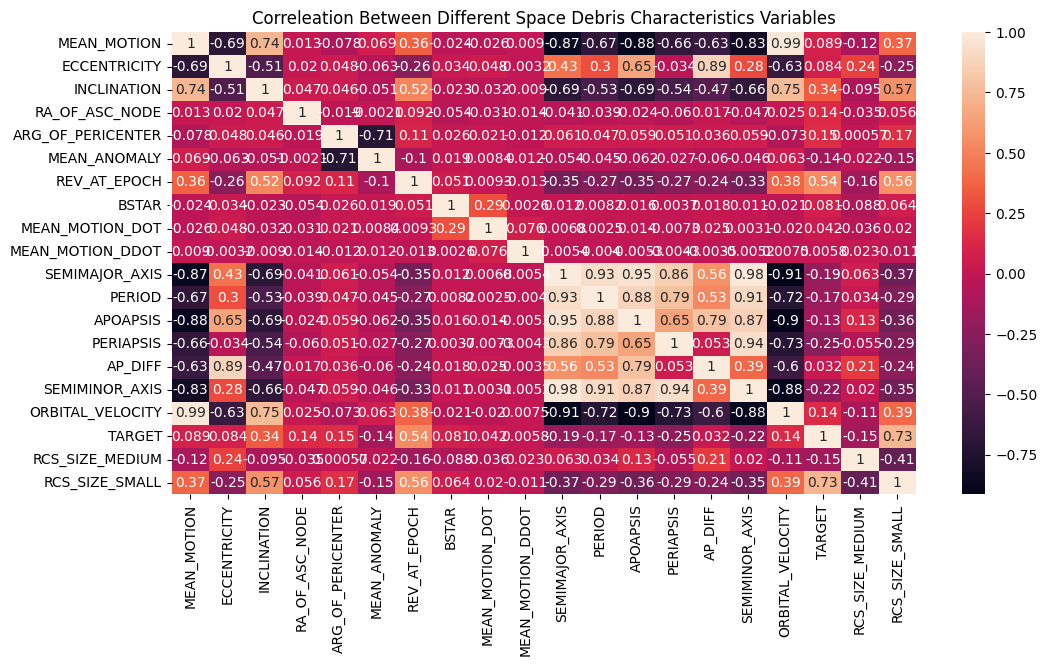

In [26]:
# Looking at correleations between the variables that are selected
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True)
plt.title('Correleation Between Different Space Debris Characteristics Variables')


In [49]:
# Final data for model
df_encoded.to_csv('spacefinal_cleaned.csv',index=False)